In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [5]:
X = np.empty((100, 2))
np.random.seed = 666
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] =0.75 * X[:, 0] + 3. + np.random.normal(0, 10. , size=100)

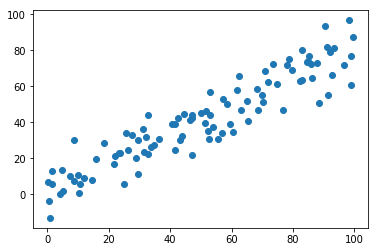

In [6]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [7]:
def demean(X):
    return X - np.mean(X, axis=0) 

In [11]:
X_demean = demean(X)

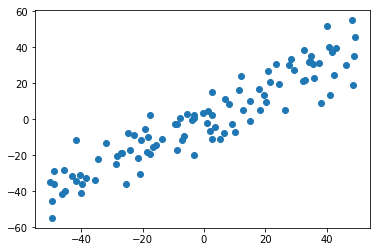

In [12]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.show()

In [13]:
np.mean(X_demean[:,0])

-8.668621376273222e-15

### 梯度上升法

In [14]:
def f(w, X):
    return np.sum((X.dot(w)**2))/len(X)

In [15]:
def df_math(w, X):
    return X.T.dot(X.dot(w))* 2. / len(X)

In [32]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        
        w_2 = w.copy()
        w_2[i] -=epsilon
        res[i] = (f(w_1, X) -f(w_2, X)) / (2* epsilon)
        
    return res

In [28]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_descent(dJ, X,
        initial_w, eta, n_iters=1e4, epsilon=1e-7):
    w = direction(initial_w)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(w, X)
        last_w = w
        w = w + eta * gradient 
        w = direction(w)
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        i_iter += 1
    return w

In [33]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
reg = gradient_descent(df_debug, X_demean, initial_w, eta )

In [34]:
reg

array([0.76881651, 0.63946944])

In [37]:
w = gradient_descent(df_math, X_demean, initial_w, eta )
w

array([0.76881651, 0.63946944])

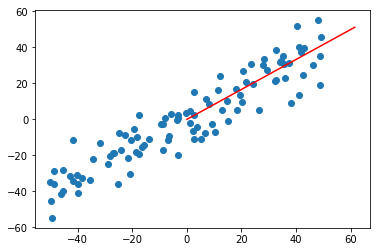

In [39]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.plot([0, w[0]*80] , [0, w[1]*80], color='r' )
plt.show()

In [40]:
X = np.empty((100, 2))
np.random.seed = 666
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] =0.75 * X[:, 0] + 3. + np.random.normal(0, 10. , size=100)

In [41]:
X_demean = demean(X)

In [42]:
def df(w, X):
    return X.T.dot(X.dot(w))* 2. / len(X)

In [43]:
def first_component(dJ, X,
        initial_w, eta, n_iters=1e4, epsilon=1e-7):
    w = direction(initial_w)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(w, X)
        last_w = w
        w = w + eta * gradient 
        w = direction(w)
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        i_iter += 1
    return w

In [44]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = first_component(df_debug, X_demean, initial_w, eta )

In [45]:
w

array([0.78318752, 0.62178558])

In [48]:
X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w
X2 = X - X.dot(w).reshape(-1, 1) * w

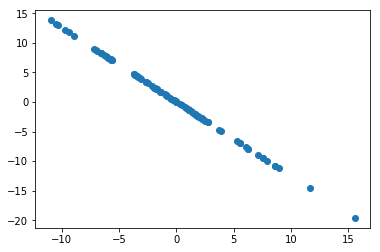

In [54]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [55]:
w2 = first_component(df_debug, X2, initial_w, eta )
w2

array([-0.62172706,  0.78323397])

In [56]:
w.dot(w2)

7.471318305501962e-05

In [57]:
def first_n_component(n, X, eta=0.01, n_iters=1e4, epsilon=1e-7):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res= []
    
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(df, X_pca, initial_w, eta )
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    
    return res

In [58]:
first_n_component(2, X_demean)

[array([0.78318818, 0.62178475]), array([-0.62177574,  0.78319533])]

In [59]:
import numpy as np


class PCA:

    def __init__(self, n_components):
        """初始化PCA"""
        assert n_components >= 1, "n_components must be valid"
        self.n_components = n_components
        self.components_ = None

    def fit(self, X, eta=0.01, n_iters=1e4):
        """获得数据集X的前n个主成分"""
        assert self.n_components <= X.shape[1], \
            "n_components must not be greater than the feature number of X"

        def demean(X):
            return X - np.mean(X, axis=0)

        def f(w, X):
            return np.sum((X.dot(w) ** 2)) / len(X)

        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)

        def direction(w):
            return w / np.linalg.norm(w)

        def first_component(X, initial_w, eta=0.01, n_iters=1e4, epsilon=1e-8):

            w = direction(initial_w)
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w = w + eta * gradient
                w = direction(w)
                if (abs(f(w, X) - f(last_w, X)) < epsilon):
                    break

                cur_iter += 1

            return w

        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, initial_w, eta, n_iters)
            self.components_[i,:] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

        return self

    def transform(self, X):
        """将给定的X，映射到各个主成分分量中"""
        assert X.shape[1] == self.components_.shape[1]

        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        """将给定的X，反向映射回原来的特征空间"""
        assert X.shape[1] == self.components_.shape[0]

        return X.dot(self.components_)

    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components



In [60]:
X = np.empty((100, 2))
np.random.seed = 666
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] =0.75 * X[:, 0] + 3. + np.random.normal(0, 10. , size=100)

In [65]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [66]:
pca.components_

array([[0.7794437 , 0.62647228]])

In [67]:
X_reduction = pca.transform(X)

In [68]:
X_reduction.shape

(100, 1)

In [69]:
X_restore = pca.inverse_transform(X_reduction)

In [70]:
X_restore.shape

(100, 2)

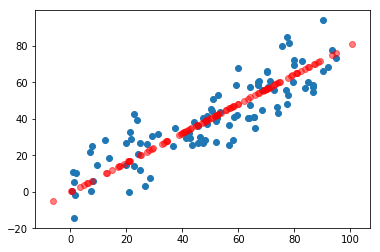

In [72]:
plt.scatter(X[:,0], X[:, 1])
plt.scatter(X_restore[:,0], X_restore[:, 1] , color='r', alpha=0.5)
plt.show()

降维丢失信息

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=1)

In [76]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [77]:
pca.components_

array([[-0.77944387, -0.62647207]])

In [78]:
X_reduction = pca.transform(X)

In [79]:
X_reduction.shape

(100, 1)

In [80]:
X_restore = pca.inverse_transform(X_reduction)

In [81]:
X_restore.shape

(100, 2)

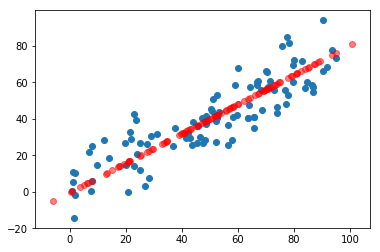

In [82]:
plt.scatter(X[:,0], X[:, 1])
plt.scatter(X_restore[:,0], X_restore[:, 1] , color='r', alpha=0.5)
plt.show()

In [83]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [85]:
X_train.shape

(1347, 64)

In [86]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 5.17 ms, sys: 47 µs, total: 5.22 ms
Wall time: 4.23 ms


In [87]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [105]:
pca = PCA(n_components = 60)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [106]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)


CPU times: user 4.33 ms, sys: 0 ns, total: 4.33 ms
Wall time: 3.72 ms


In [107]:
knn_clf.score(X_test_reduction, y_test)

0.9866666666666667

In [108]:
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

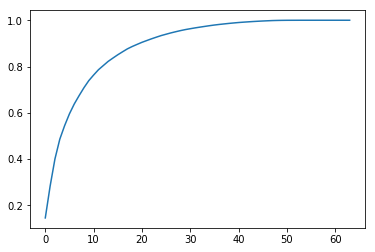

In [110]:
plt.plot([i for i in range(X_train.shape[1])], 
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1]) ] )
plt.show()

In [111]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [112]:
pca.n_components_

28

In [113]:
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [114]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 3.4 ms, sys: 0 ns, total: 3.4 ms
Wall time: 3.59 ms


In [115]:
knn_clf.score(X_test_reduction, y_test)

0.98

In [116]:
pca = PCA(n_components =2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [117]:
X_reduction = pca.transform(X)

In [118]:
X_reduction.shape

(1797, 2)

In [ ]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i, 1], alpha=0.7)
plt.show()